In [1]:
#assignment 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.DataFrame({'Name':['Alice', 'Bob', 'Charlie', 'David', 'Emma',"a","b","c","d","e"],
                   'marks1':[70, 80, 85, 90, 95,65, 75, 60, 50, 85],
                   'marks2':[60, np.nan, 75, 80, 85, 55, 65, 50, 40, 75],
                     'marks3':[5, 60, 65, 70, 75,45, 55, 40, 30, 65],
                   'division':['B','A','B','B','A','B','A','B','B','A']})

In [4]:
df

,Name,marks1,marks2,marks3,division
0,Alice,70,60.0,5,B
1,Bob,80,NaN,60,A
2,Charlie,85,75.0,65,B
3,David,90,80.0,70,B
4,Emma,95,85.0,75,A
5,a,65,55.0,45,B
6,b,75,65.0,55,A
7,c,60,50.0,40,B
8,d,50,40.0,30,B
9,e,85,75.0,65,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      10 non-null     object 
 1   marks1    10 non-null     int64  
 2   marks2    9 non-null      float64
 3   marks3    10 non-null     int64  
 4   division  10 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


In [6]:
df.describe()

,marks1,marks2,marks3
count,10.000000,9.0,10.000000
mean,75.500000,65.0,51.000000
std,14.230249,15.0,21.447611
min,50.000000,40.0,5.000000
25%,66.250000,55.0,41.250000
50%,77.500000,65.0,57.500000
75%,85.000000,75.0,65.000000
max,95.000000,85.0,75.000000


In [7]:
df.isnull().sum()

Name        0
marks1      0
marks2      1
marks3      0
division    0
dtype: int64

In [8]:
df["marks1"].fillna(df[['marks2','marks3']].mean(axis = 1),inplace = True)
df["marks2"].fillna(df[['marks1','marks2']].mean(axis = 1), inplace = True)
df['marks3'].fillna(df[['marks1','marks2']].mean(axis=1), inplace = True)

In [9]:
df

,Name,marks1,marks2,marks3,division
0,Alice,70,60.0,5,B
1,Bob,80,80.0,60,A
2,Charlie,85,75.0,65,B
3,David,90,80.0,70,B
4,Emma,95,85.0,75,A
5,a,65,55.0,45,B
6,b,75,65.0,55,A
7,c,60,50.0,40,B
8,d,50,40.0,30,B
9,e,85,75.0,65,A


In [10]:
df.isnull().sum()

Name        0
marks1      0
marks2      0
marks3      0
division    0
dtype: int64

<Axes: xlabel='marks3'>

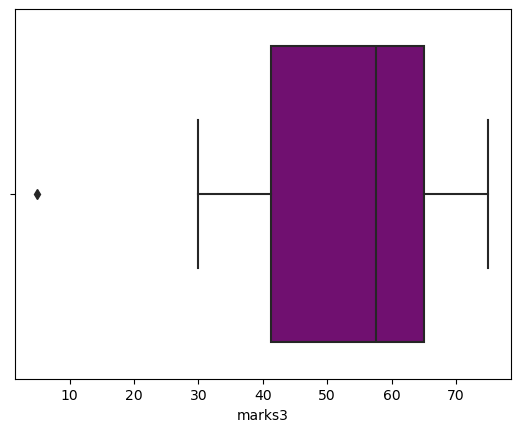

In [11]:
sns.boxplot(data=df ,x='marks3', color = 'purple')

In [12]:
def detect_outliers(data):
    Q1= data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    outlier = data[(data < lower_bound) | (data > upper_bound)]
    return outlier

In [13]:
outlier = detect_outliers(df['marks3'])
outlier

0    5
Name: marks3, dtype: int64

In [14]:
df_wo_outliers=df[~df['marks3'].isin(outlier)]

In [15]:
df_wo_outliers

,Name,marks1,marks2,marks3,division
1,Bob,80,80.0,60,A
2,Charlie,85,75.0,65,B
3,David,90,80.0,70,B
4,Emma,95,85.0,75,A
5,a,65,55.0,45,B
6,b,75,65.0,55,A
7,c,60,50.0,40,B
8,d,50,40.0,30,B
9,e,85,75.0,65,A


<Axes: xlabel='marks3'>

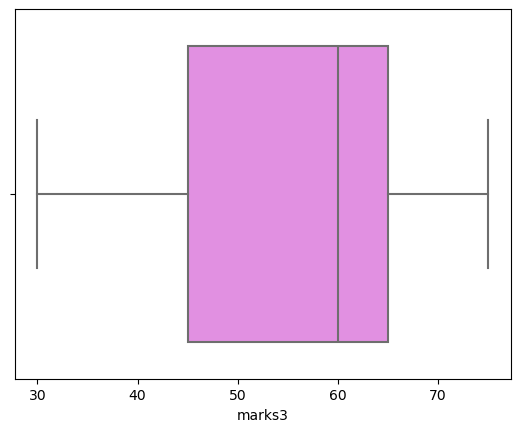

In [16]:
sns.boxplot(data = df_wo_outliers, x = 'marks3' ,color = "violet")

In [17]:
scaler = StandardScaler()
df[['marks1', 'marks2', 'marks3']] = scaler.fit_transform( df[['marks1', 'marks2', 'marks3']])

C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

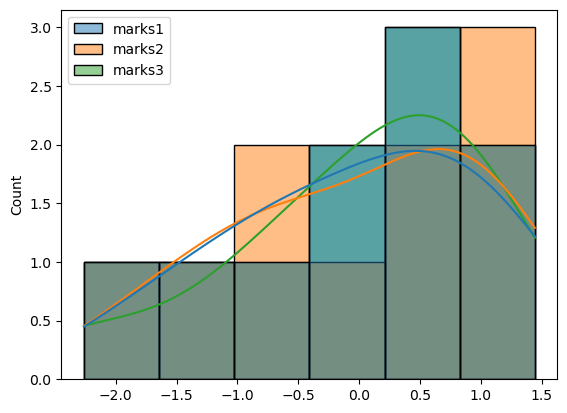

In [18]:
sns.histplot(df, kde = True)